In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

In [2]:
##### Generate synthatic Data -
x,y = make_classification(n_samples=5000,n_features=10,n_classes=2,random_state=42)
print(x.shape)
print(y.shape)
print(x)

(5000, 10)
(5000,)
[[ 1.86419953 -2.3711592  -0.67130759 ... -0.67354431 -0.69646109
  -0.07686541]
 [ 0.33548674  0.27130442 -2.02015145 ...  0.31740948  0.38546963
   0.13372972]
 [ 0.14663259 -1.54427911  0.59252101 ... -0.20558104 -1.03009508
  -0.65817527]
 ...
 [-1.06725502  1.3232629   0.40885419 ... -0.03644982 -1.3116659
  -2.0157712 ]
 [ 1.21249094 -1.28557149 -0.81813422 ... -1.84190565  0.39546944
  -1.16454678]
 [ 0.02000132 -1.05592707  1.88566879 ... -1.8550231   0.17599725
  -0.36139164]]


In [3]:
##### Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [4]:
x_train.shape

(4000, 10)

In [5]:
y_train.shape

(4000,)

In [6]:
###### two diffrent method to modeling
logistic_model = LogisticRegression(random_state=1234)
logistic_model.fit(x_train,y_train)

decisiontree_model = DecisionTreeClassifier(criterion= "entropy",random_state=1234)
decisiontree_model.fit(x_train,y_train)

print("Training the Model")

Training the Model


In [18]:
###### predictioned by matrix
y_pred_logistic = logistic_model.predict(x_test)
y_pred_ds = decisiontree_model.predict(x_test)

In [21]:
confusion_matrix(y_test,y_pred_logistic) ### checking the accuracy testing data by confusion matrix

array([[438,  60],
       [ 64, 438]], dtype=int64)

In [22]:
accuracy_score(y_test,y_pred_logistic)

0.876

In [23]:
confusion_matrix(y_test,y_pred_ds)

array([[441,  57],
       [ 77, 425]], dtype=int64)

In [24]:
accuracy_score(y_test,y_pred_ds)

0.866

In [7]:
###### predictioned by AUC_ROC curve
y_pred_logistic = logistic_model.predict_proba(x_test)[:,1]
y_pred_ds = decisiontree_model.predict_proba(x_test)[:,1]

In [8]:
##### create a dataframe
test_df = pd.DataFrame({"Actual": y_test, "Logistic":y_pred_logistic, "decision_Tree": y_pred_ds})
test_df

,Actual,Logistic,decision_Tree
0,1,0.666400,1.0
1,0,0.024260,0.0
2,0,0.276567,1.0
3,0,0.171618,0.0
4,1,0.994985,1.0
...,...,...,...
995,0,0.434311,0.0
996,1,0.328866,0.0
997,1,0.989591,1.0
998,1,0.973410,1.0


In [17]:
for model in ["Logistic","decision_Tree"]:
    fpr,tpr,thresh = roc_curve(test_df["Actual"],test_df[model])
    print(model)
    roc_auc = auc(fpr,tpr)
    print(roc_auc)

Logistic
0.9396470343525496
decision_Tree
0.866077857245716


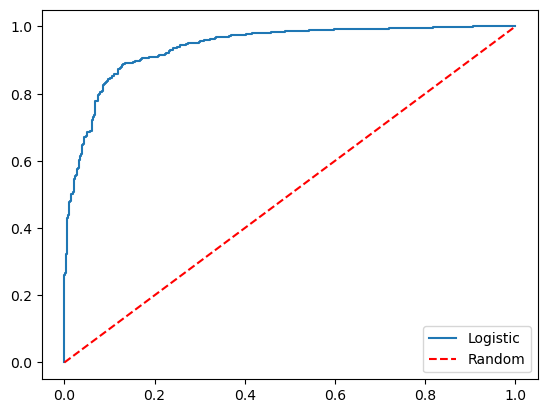

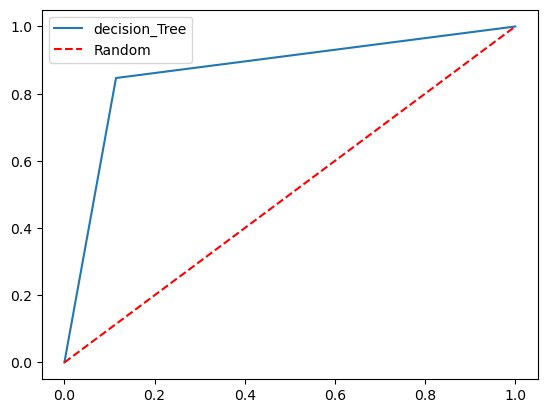

In [16]:
for model in ["Logistic","decision_Tree"]:
    fpr,tpr,thresh = roc_curve(test_df["Actual"],test_df[model])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label = f'{model}')
    plt.plot([0,1],[0,1],"r--",label = "Random")
    plt.legend()
    plt.show()